In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
my_path="/content/drive/MyDrive/CS491/Data/"

# Download a novel and prepare for analysis

Some pre-processing: download novel from Gutenberg, then remove preamble and postamble

In [3]:
title = 'History of the United States of America'
tit='Hist' #short title for future reference if needed
author = 'Henry Adams'
url = 'https://www.gutenberg.org/cache/epub/72884/pg72884-images.html'
path = my_path

In [6]:
import os
import urllib.request  # Import the module required for making HTTP requests



# Check if the file is stored locally
filename = my_path + title
if os.path.isfile(filename) and os.stat(filename).st_size != 0:
    print("{title} file already exists".format(title=title))
    with open(filename, 'r') as f:
        raw = f.read()
else:
    print("{title} file does not already exist. Grabbing from Project Gutenberg".format(title=title))
    response = urllib.request.urlopen(url)
    raw = response.read().decode('utf-8-sig')
    print("Saving {title} file".format(title=title))
    with open(filename, 'w') as outfile:
        outfile.write(raw)


History of the United States of America file does not already exist. Grabbing from Project Gutenberg
Saving History of the United States of America file


In the file browser to the left, open the book. The text should (might?) appear in a cell on the right. Delete preamble and postamble, then save.

In [74]:
##These two lines demonsrate that you have succeeded in removing the Guttenberg preamble and postamble

print(f"first 100 characters: {raw[13950:14050]}")
print(f"last 100 characters: {raw[-130:-30]}")

first 100 characters: > had a great nation approached nearer than England to  ruin without showing consciousness of danger
last 100 characters: duce our new eBooks, and how to  subscribe to our email newsletter to hear about new eBooks.  </div>


In [75]:
# first, remove unwanted new line and tab characters from the text
for char in ["\n", "\r", "\d", "\t"]:
   raw = raw.replace(char, " ")

with open(filename, 'w') as outfile:
    outfile.write(raw)

In [76]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
all_tokens=word_tokenize(raw)#.lower())

In [78]:
all_tokens[60:80]

['90',
 '%',
 ';',
 'margin-top',
 ':',
 '0',
 ';',
 'margin-bottom',
 ':',
 '0',
 ';',
 'text-align',
 ':',
 'center',
 ';',
 '}',
 '#',
 'pg-footer',
 'li',
 '{']

In [12]:
clean_tokens=[word for word in all_tokens if word.isalpha()]

In [13]:
clean_tokens[60:80]

['Madison',
 'Volume',
 'of',
 'Project',
 'Gutenberg',
 'link',
 'icon',
 'style',
 'body',
 'center',
 'clear',
 'both',
 'normal',
 'p',
 'justify',
 'hr',
 'width',
 'clear',
 'both',
 'width']

# Zipf's Law

[Zipf's Law Wiki](https://en.wikipedia.org/wiki/Zipf%27s_law)

In [14]:
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

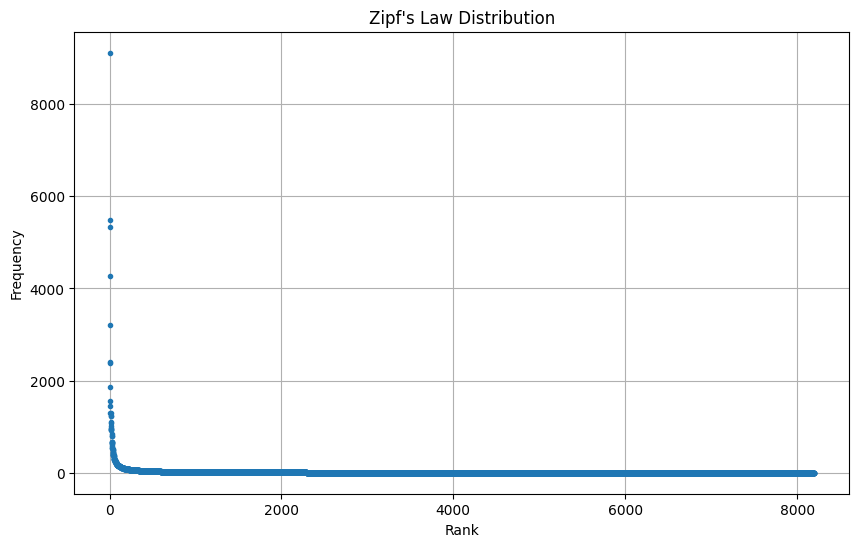

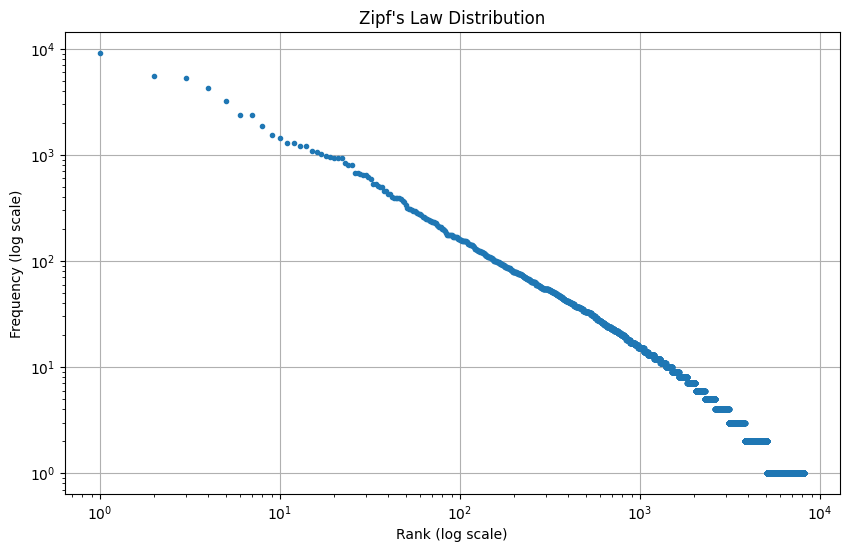

Estimated exponent 's' in Zipf's Law: 1.2859620086540022


In [15]:
##Zipf's Law
clean_tokens_lower = [word.lower() for word in clean_tokens]
word_frequencies = Counter(clean_tokens_lower)
sorted_frequencies = sorted(word_frequencies.values(), reverse=True)

# Create an array of ranks (1, 2, 3, ...)
ranks = np.arange(1, len(sorted_frequencies) + 1)


plt.figure(figsize=(10, 6))
plt.plot(ranks, sorted_frequencies, marker='.', linestyle='None')
plt.title("Zipf's Law Distribution")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot the data on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_frequencies, marker='.', linestyle='None')
plt.title("Zipf's Law Distribution")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True)
plt.show()

from scipy.stats import linregress

# Assuming you have already calculated ranks and sorted_frequencies as mentioned earlier
log_ranks = np.log(ranks)
log_frequencies = np.log(sorted_frequencies)

# Fit a linear regression model to the log-log data
slope, intercept, r_value, p_value, std_err = linregress(log_ranks, log_frequencies)

# The slope of the regression line represents the estimated exponent 's'
estimated_s = -slope

print(f"Estimated exponent 's' in Zipf's Law: {estimated_s}")

# Stopwords, wordcloud, hapaxes, lexical dispersion

In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
stop_words=stopwords.words('english')

In [19]:
#Note that All_words is case sensitive (later will use all_words)
#A reason for this is to preserve capitalization of proper names in a word cloud
All_words = [word for word in clean_tokens if word.casefold() not in stop_words]

In [20]:
print(All_words[0:20])

['DOCTYPE', 'html', 'html', 'en', 'head', 'meta', 'style', 'div', 'div', 'initial', 'display', 'block', 'center', 'li', 'initial', 'display', 'block', 'bold', 'center', 'inherit']


In [21]:
All_fd=nltk.FreqDist(All_words)

In [22]:
All_fd

FreqDist({'pginternal': 2393, 'li': 1867, 'p': 1288, 'http': 1227, 'pgexternal': 1224, 'div': 649, 'war': 559, 'span': 500, 'pagenum': 459, 'would': 404, ...})

In [79]:
All_fd.most_common(100)

[('pginternal', 2393),
 ('li', 1867),
 ('p', 1288),
 ('http', 1227),
 ('pgexternal', 1224),
 ('div', 649),
 ('war', 559),
 ('span', 500),
 ('pagenum', 459),
 ('would', 404),
 ('fnanchor', 390),
 ('footnote', 390),
 ('label', 390),
 ('could', 380),
 ('British', 364),
 ('ii', 308),
 ('American', 307),
 ('President', 299),
 ('Monroe', 287),
 ('England', 271),
 ('one', 267),
 ('Congress', 261),
 ('States', 246),
 ('Madison', 243),
 ('hangingindent', 234),
 ('made', 227),
 ('Hull', 223),
 ('United', 217),
 ('State', 186),
 ('blockquot', 175),
 ('two', 175),
 ('Harrison', 174),
 ('government', 173),
 ('without', 171),
 ('Napoleon', 170),
 ('men', 165),
 ('every', 158),
 ('force', 158),
 ('army', 158),
 ('hundred', 156),
 ('might', 156),
 ('Dearborn', 146),
 ('New', 142),
 ('French', 142),
 ('France', 142),
 ('time', 138),
 ('July', 137),
 ('thousand', 130),
 ('wrote', 130),
 ('Government', 126),
 ('Serurier', 126),
 ('Foster', 125),
 ('Secretary', 125),
 ('June', 124),
 ('Indians', 124),
 ('

In [24]:
from wordcloud import WordCloud

In [25]:
wordcloud = WordCloud(width = 1000, height = 800,
                      background_color ='white',
                      max_words=200,
                      prefer_horizontal=0.5,
                      random_state=4,
                      contour_color='steelblue').generate_from_frequencies(All_fd)

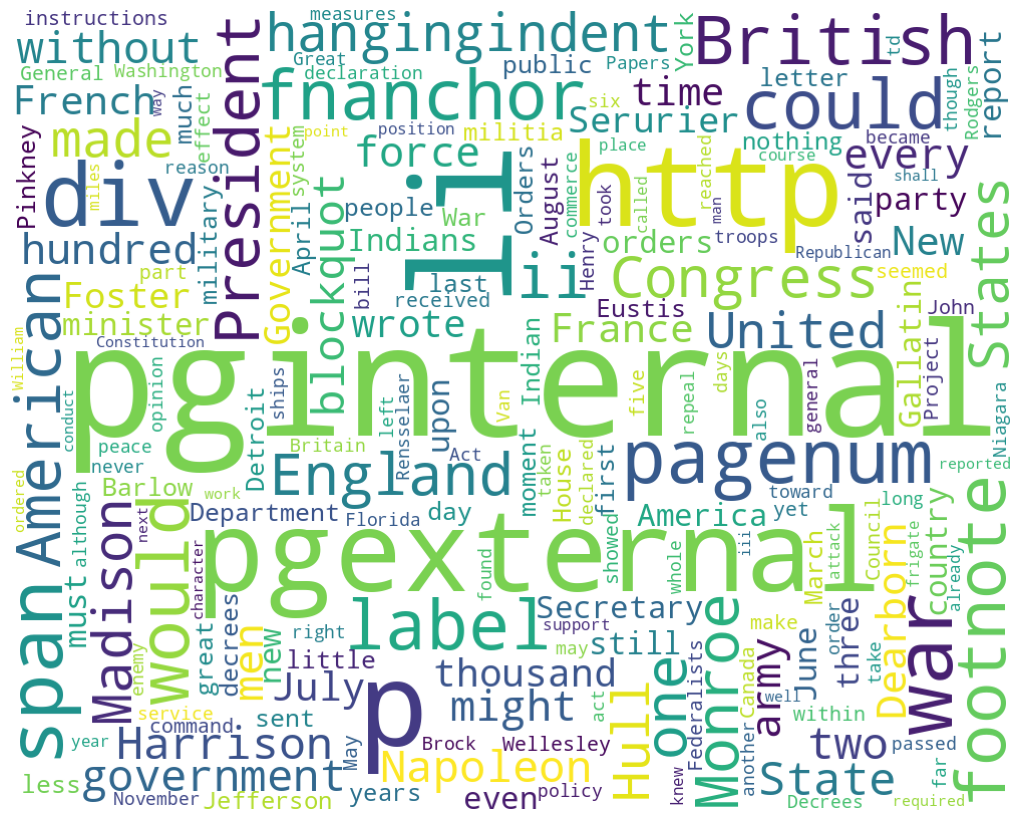

In [26]:
# plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = -0.1)

plt.show()

In [27]:
#Now working with all words lower case
all_words = [word.lower() for word in All_words]

In [28]:
all_fd=nltk.FreqDist(all_words)

In [29]:
single_words=all_fd.hapaxes()

In [30]:
len(single_words)

3124

In [31]:
import random

In [32]:
random.choices(single_words,k=20)

['deigned',
 'accents',
 'dans',
 'blasted',
 'icy',
 'reforming',
 'reimbursements',
 'admired',
 'tenor',
 'demonstration',
 'dismantled',
 'auctions',
 'rolls',
 'awkwardly',
 'corrupt',
 'redeem',
 'exports',
 'magnanimous',
 'artificers',
 'slightest']

In [33]:
Top_words = [word for (word, freq) in All_fd.most_common(10)]
print(Top_words)

['pginternal', 'li', 'p', 'http', 'pgexternal', 'div', 'war', 'span', 'pagenum', 'would']


In [34]:
from nltk.draw.dispersion import dispersion_plot

<Figure size 1200x900 with 0 Axes>

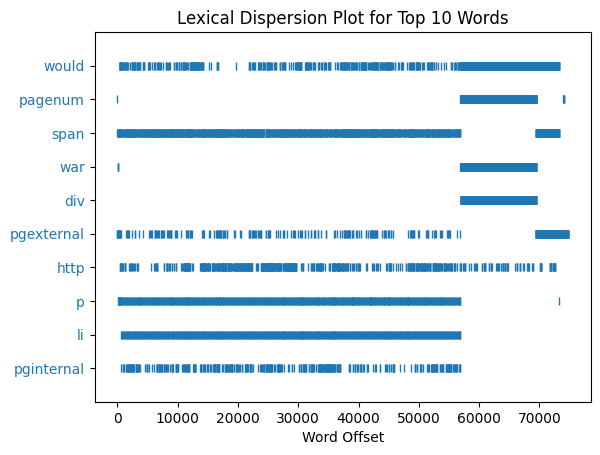

In [35]:
plt.figure(figsize=(12, 9))
dispersion_plot(All_words, Top_words, ignore_case=True, title='Lexical Dispersion Plot for Top 10 Words')
plt.show()

In [36]:
V = set(all_words)
long_words = [w for w in V if len(w) > 12]

In [37]:
long_words

['enlightenment',
 'unenforceability',
 'unconquerable',
 'manufacturers',
 'inconsistency',
 'sensitiveness',
 'appropriations',
 'remonstrances',
 'gentlemanlike',
 'unconditionally',
 'conscientiously',
 'extravagances',
 'reorganization',
 'parliamentary',
 'counterbalanced',
 'circumstanced',
 'administration',
 'corresponding',
 'revolutionizing',
 'extraordinary',
 'electronically',
 'considerations',
 'consciousness',
 'deliberations',
 'commissioners',
 'disgracefully',
 'investigating',
 'circumstantial',
 'technicalities',
 'proportionally',
 'appropriation',
 'procrastination',
 'denunciations',
 'representations',
 'apprehensions',
 'recollections',
 'commonwealths',
 'plenipotentiary',
 'electioneering',
 'insignificance',
 'pottawatomies',
 'international',
 'discouragement',
 'demonstration',
 'reconciliation',
 'insurrections',
 'comparatively',
 'contradiction',
 'recapitulation',
 'naturalization',
 'contemptuously',
 'reimbursements',
 'mismanagement',
 'unsatisfact

In [38]:
big_words=sorted(w for w in set(long_words) if len(w) > 10 and all_fd[w] > 7)
len(big_words)

17

In [39]:
print(big_words)

['administration', 'circumstances', 'communication', 'constellation', 'distinguished', 'embarrassment', 'establishment', 'extraordinary', 'hangingindent', 'intelligencer', 'massachusetts', 'pottawatomies', 'reinforcements', 'remonstrances', 'representatives', 'responsibility', 'revolutionary']


<Figure size 1200x900 with 0 Axes>

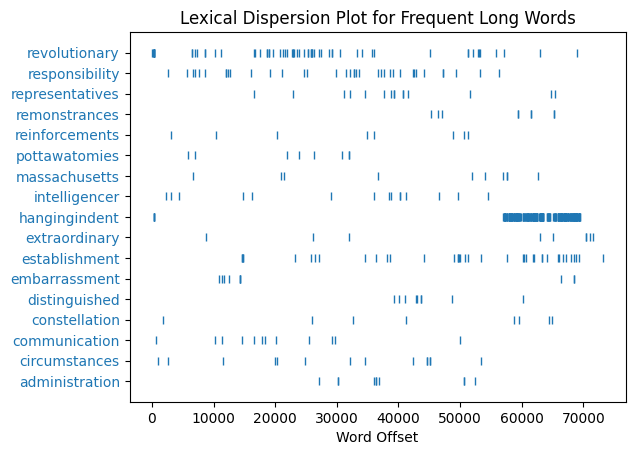

In [40]:
plt.figure(figsize=(12, 9))
dispersion_plot(all_words, big_words, ignore_case=True, title='Lexical Dispersion Plot for Frequent Long Words')
plt.show()

# Bigrams and Trigrams

In [41]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures


finder = BigramCollocationFinder.from_words(clean_tokens)



In [42]:
frequent_bigrams = finder.nbest(BigramAssocMeasures.raw_freq, 100)
print(frequent_bigrams)

[('a', 'pginternal'), ('of', 'the'), ('a', 'http'), ('http', 'pgexternal'), ('pginternal', 'li'), ('pgexternal', 'li'), ('to', 'the'), ('in', 'the'), ('pginternal', 'a'), ('span', 'pagenum'), ('pgexternal', 'a'), ('li', 'his'), ('a', 'fnanchor'), ('a', 'label'), ('div', 'footnote'), ('fnanchor', 'pginternal'), ('footnote', 'p'), ('label', 'pginternal'), ('p', 'a'), ('on', 'the'), ('that', 'the'), ('ii', 'a'), ('and', 'the'), ('to', 'be'), ('for', 'the'), ('i', 'a'), ('of', 'a'), ('li', 'hangingindent'), ('United', 'States'), ('the', 'President'), ('with', 'the'), ('by', 'the'), ('the', 'United'), ('blockquot', 'p'), ('div', 'blockquot'), ('had', 'been'), ('of', 'his'), ('the', 'British'), ('at', 'the'), ('from', 'the'), ('p', 'The'), ('in', 'a'), ('could', 'not'), ('he', 'had'), ('the', 'American'), ('the', 'war'), ('have', 'been'), ('of', 'war'), ('of', 'Congress'), ('the', 'same'), ('the', 'French'), ('was', 'the'), ('would', 'have'), ('by', 'a'), ('that', 'he'), ('p', 'span'), ('as'

In [43]:
finder.apply_freq_filter(5)  # This filters out bigrams that occur less than 5 times
statistical_bigrams = finder.nbest(BigramAssocMeasures.raw_freq, 5)  # Adjust as needed
# also try bigram_measures.pmi, bigram_measures.chi_sq,likelihood_ratio,student_t,likelihood_ratio
statistical_bigrams


[('a', 'pginternal'),
 ('of', 'the'),
 ('a', 'http'),
 ('http', 'pgexternal'),
 ('pginternal', 'li')]

In [44]:
len(statistical_bigrams)

5

In [89]:

from nltk import bigrams
from nltk.probability import ConditionalFreqDist

def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        # Get the most frequent next words (up to 3)
        next_words = list(cfdist[word].keys())[:3]
        if next_words:
            # Randomly choose from the top 3 words
            word = random.choice(next_words)
        else:
            break

# Your existing list of words
clean_tokens = ["a", "pginternal", "of", "the", "http", "pgexternal", "li"]  # Replace with your token list

# Generate bigrams from your list of words
clean_bigrams = bigrams(clean_tokens)

# Create a Conditional Frequency Distribution (CFD) from these bigrams
cfd = ConditionalFreqDist(clean_bigrams)

# Example usage
generate_model(cfd, 'I')  # Replace 'your_seed_word' with your desired starting word


I 

In [47]:
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder



# Create a trigram measures object
trigram_measures = TrigramAssocMeasures()

# Create a Trigram finder
finder = TrigramCollocationFinder.from_words(clean_tokens)

# You can then find trigrams using different measures, e.g., by raw frequency
trigrams = finder.nbest(trigram_measures.raw_freq, 10)  # top 10 trigrams
# trigrams = finder.nbest(trigram_measures.pmi, 20)  # top 10 trigrams
# trigrams=finder.nbest(trigram_measures.likelihood_ratio,20)

# Print trigrams
for trigram in trigrams:
    print(trigram)


('a', 'pginternal', 'of')
('http', 'pgexternal', 'li')
('of', 'the', 'http')
('pginternal', 'of', 'the')
('the', 'http', 'pgexternal')


In [51]:
from nltk import trigrams


def generate_model(cfdist, word1, word2, num=15):
    print(word1, word2, end=' ')
    for i in range(num - 2):  # Adjust the range since two words are already printed
        next_words = list(cfdist[(word1, word2)].keys())[:3]
        if next_words:
            next_word = random.choice(next_words)
            print(next_word, end=' ')
            word1, word2 = word2, next_word
        else:
            break


# Your existing list of words
clean_tokens = ["a", "pginternal", "of", "the", "http", "pgexternal", "li"]

# Generate trigrams from your list of words
clean_trigrams = trigrams(clean_tokens)

# Create a Conditional Frequency Distribution (CFD) from these trigrams
cfd = ConditionalFreqDist(((w1, w2), w3) for w1, w2, w3 in clean_trigrams)

# Example usage, with two seed words
generate_model(cfd, 'I', 'only')  # Replace with your desired starting words


I only 

# Lemmmatization, contractions

First let's normalize contractions. So we hope to replace things like "let's" with "let us" and "can't" with "cannot", etc.

In [91]:
!pip install contractions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.4 MB/s eta 0:00:00


In [92]:
help(contractions)

Help on package contractions:

NAME
    contractions

PACKAGE CONTENTS
    data (package)
    test___init__

FUNCTIONS
    add(key, value)
    
    fix(s, leftovers=True, slang=True)
    
    get_combinations(tokens, joiners)
    
    intersperse(lst, item)
    
    preview(text, flank)
        Return all contractions and their location before fix for manual check. Also provide a viewing window to quickly
        preview the contractions in the text.
        :param text: texture.
        :param flank: int number, control the size of the preview window. The window would be "flank-contraction-flank".
        :return: preview_items, a list includes all matched contractions and their locations.

DATA
    comb = "you'd've"
    contractions_dict = {"'cause": 'because', "'em": 'them', "'tis": 'it i...
    json_open = b'{\n     "\'aight": "alright",\n     "abt": "ab...a": "wa...
    k = 'you’d’ve'
    leftovers_dict = {"'all": '', "'am": '', "'cause": 'because', "'coz": ...
    month = 'decemb

In [93]:
expanded_text = contractions.fix(raw)

In [ ]:
# expanded_text

In [94]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [95]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Assuming 'expanded_text' is your text after expanding contractions
# expanded_text = "Your expanded text here"

# Tokenize the text
tokens = word_tokenize(expanded_text)

# Lemmatize each word
lemmatized_text = ' '.join([lemmatizer.lemmatize(token) for token in tokens])

lemmatized_text


"< ! DOCTYPE html > < html lang= '' en '' > < head > < meta charset= '' utf-8 '' > < style > # pg-header div , # pg-footer div { all : initial ; display : block ; margin-top : 1em ; margin-bottom : 1em ; margin-left : 2em ; } # pg-footer div.agate { font-size : 90 % ; margin-top : 0 ; margin-bottom : 0 ; text-align : center ; } # pg-footer li { all : initial ; display : block ; margin-top : 1em ; margin-bottom : 1em ; text-indent : -0.6em ; } # pg-footer div.secthead { font-size : 110 % ; font-weight : bold ; } # pg-footer # project-gutenberg-license { font-size : 110 % ; margin-top : 0 ; margin-bottom : 0 ; text-align : center ; } # pg-header-heading { all : inherit ; text-align : center ; font-size : 120 % ; font-weight : bold ; } # pg-footer-heading { all : inherit ; text-align : center ; font-size : 120 % ; font-weight : normal ; margin-top : 0 ; margin-bottom : 0 ; } # pg-header # pg-machine-header p { text-indent : -4em ; margin-left : 4em ; margin-top : 1em ; margin-bottom : 0 ;

In [96]:
lemmatized_text[30:200]

"= '' en '' > < head > < meta charset= '' utf-8 '' > < style > # pg-header div , # pg-footer div { all : initial ; display : block ; margin-top : 1em ; margin-bottom : 1em"

In [97]:
all_tokens=word_tokenize(lemmatized_text)#.lower())

In [98]:
clean_tokens=[word for word in all_tokens if word.isalpha()]

In [99]:
print(clean_tokens[0:100])

['DOCTYPE', 'html', 'html', 'en', 'head', 'meta', 'style', 'div', 'div', 'all', 'initial', 'display', 'block', 'center', 'li', 'all', 'initial', 'display', 'block', 'bold', 'center', 'all', 'inherit', 'center', 'bold', 'all', 'inherit', 'center', 'normal', 'p', 'medium', 'all', 'initial', 'strong', 'normal', 'auto', 'center', 'center', 'display', 'block', 'table', 'display', 'table', 'left', 'auto', 'auto', 'title', 'History', 'of', 'the', 'United', 'States', 'of', 'America', 'During', 'the', 'first', 'Administration', 'of', 'James', 'Madison', 'Volume', 'of', 'Project', 'Gutenberg', 'link', 'icon', 'style', 'body', 'center', 'clear', 'both', 'normal', 'p', 'justify', 'hr', 'width', 'clear', 'both', 'width', 'width', 'always', 'ul', 'none', 'table', 'margin', 'auto', 'width', 'auto', 'border', 'collapse', 'td', 'padding', 'border', 'none', 'white', 'left', 'normal', 'right', 'normal']


In [100]:
All_words = [word for word in clean_tokens if word.casefold() not in stop_words]

In [101]:
print(All_words[0:100])

['DOCTYPE', 'html', 'html', 'en', 'head', 'meta', 'style', 'div', 'div', 'initial', 'display', 'block', 'center', 'li', 'initial', 'display', 'block', 'bold', 'center', 'inherit', 'center', 'bold', 'inherit', 'center', 'normal', 'p', 'medium', 'initial', 'strong', 'normal', 'auto', 'center', 'center', 'display', 'block', 'table', 'display', 'table', 'left', 'auto', 'auto', 'title', 'History', 'United', 'States', 'America', 'first', 'Administration', 'James', 'Madison', 'Volume', 'Project', 'Gutenberg', 'link', 'icon', 'style', 'body', 'center', 'clear', 'normal', 'p', 'justify', 'hr', 'width', 'clear', 'width', 'width', 'always', 'ul', 'none', 'table', 'margin', 'auto', 'width', 'auto', 'border', 'collapse', 'td', 'padding', 'border', 'none', 'white', 'left', 'normal', 'right', 'normal', 'right', 'right', 'top', 'left', 'top', 'right', 'bottom', 'position', 'absolute', 'left', 'small', 'right', 'normal', 'normal']


In [102]:
All_fd=nltk.FreqDist(All_words)

In [103]:
All_fd

FreqDist({'pginternal': 2393, 'li': 1867, 'p': 1288, 'wa': 1287, 'http': 1235, 'pgexternal': 1224, 'div': 649, 'war': 580, 'span': 500, 'pagenum': 459, ...})

In [104]:
wordcloud = WordCloud(width = 1000, height = 800,
                      background_color ='white',
                      max_words=200,
                      prefer_horizontal=0.5,
                      random_state=4,
                      contour_color='steelblue').generate_from_frequencies(All_fd)

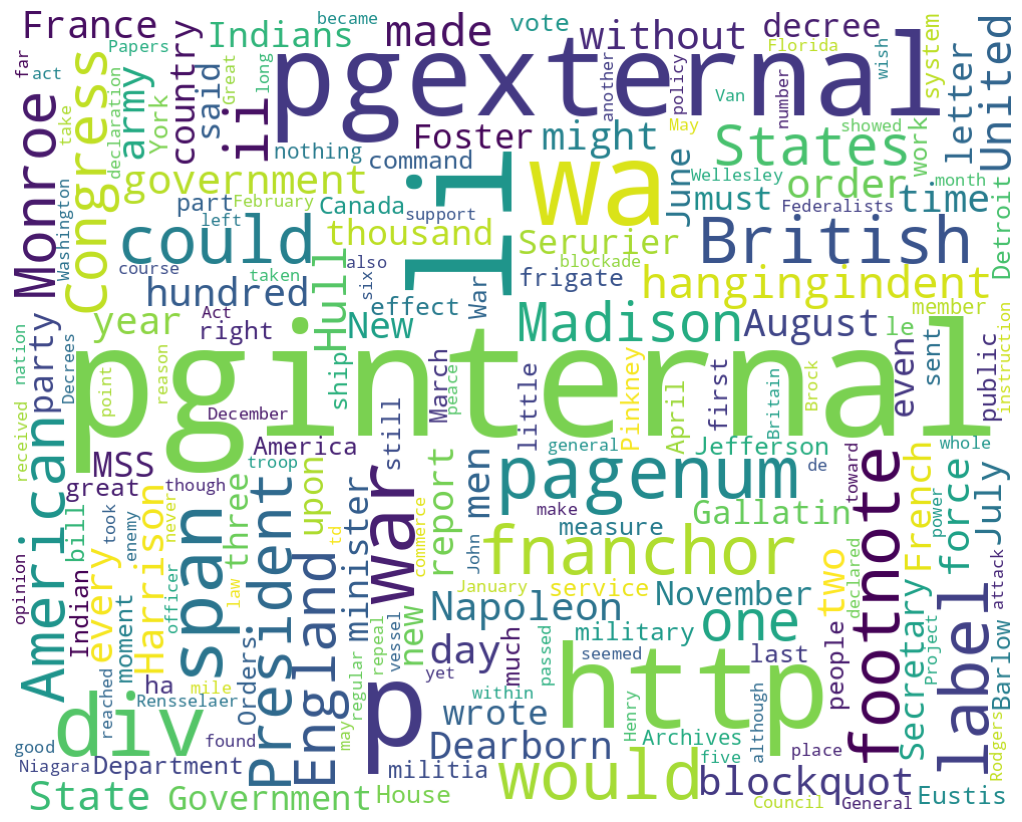

In [105]:
# plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = -0.1)

plt.show()

In [106]:
Top_words = [word for (word, freq) in All_fd.most_common(10)]
print(Top_words)

['pginternal', 'li', 'p', 'wa', 'http', 'pgexternal', 'div', 'war', 'span', 'pagenum']


<Figure size 1200x900 with 0 Axes>

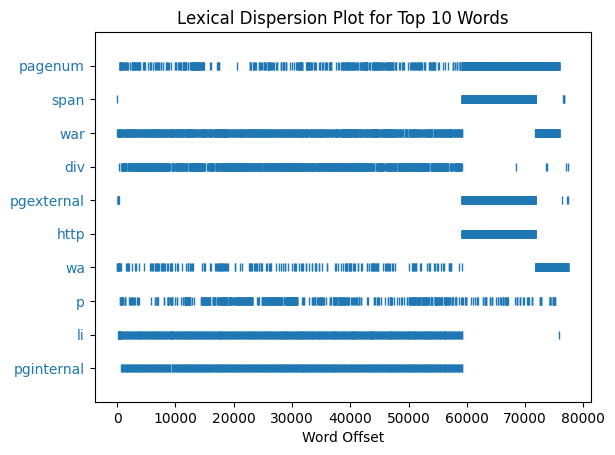

In [107]:
plt.figure(figsize=(12, 9))
dispersion_plot(All_words, Top_words, ignore_case=True, title='Lexical Dispersion Plot for Top 10 Words')
plt.show()